In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




## DATA PREPARATION

In [2]:
# Importing the dataset
df=pd.read_csv('train.csv')

In [3]:
# Shape
df.shape

(891, 12)

In [4]:
# Previewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

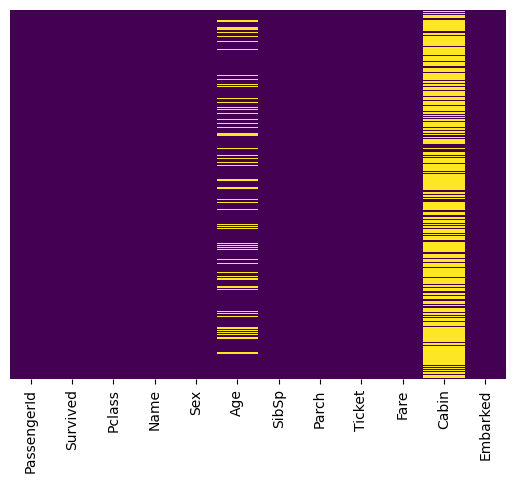

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
# Listing down the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Few conclusions

# 1. Missing values in Age, Cabin and Embarked columns
# 2. More than 70 percent values are missing in cabin columns, will have to drop


In [9]:
# Dropping cabin column

df.drop(columns=['Cabin'],inplace=True)

In [10]:
# Inputing missing values for age
# Strategy - mean

df['Age'].fillna(df['Age'].mean(), inplace=True)

## DATA VISUALIZATION


In [11]:
#style for plots
sns.set(style="whitegrid")

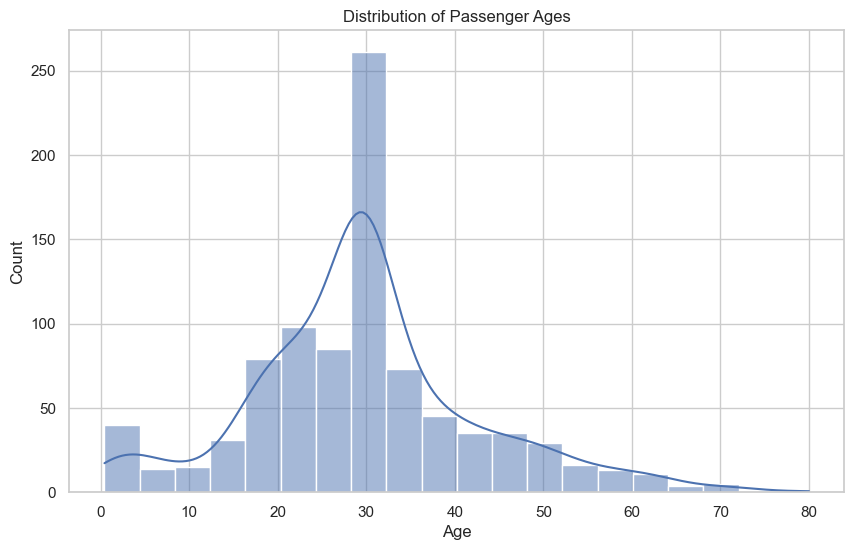

In [12]:
# Visualize the distribution of passenger ages using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Passenger Ages')
plt.show()

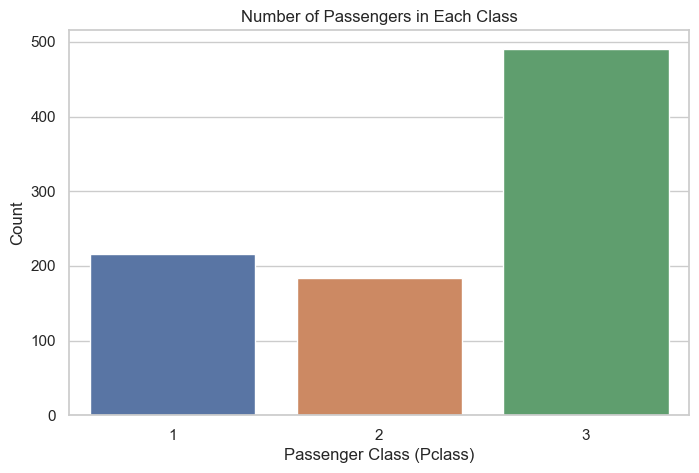

In [13]:
# bar plot showing the number of passengers in each passenger class (Pclass)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Pclass')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Count')
plt.title('Number of Passengers in Each Class')
plt.show()

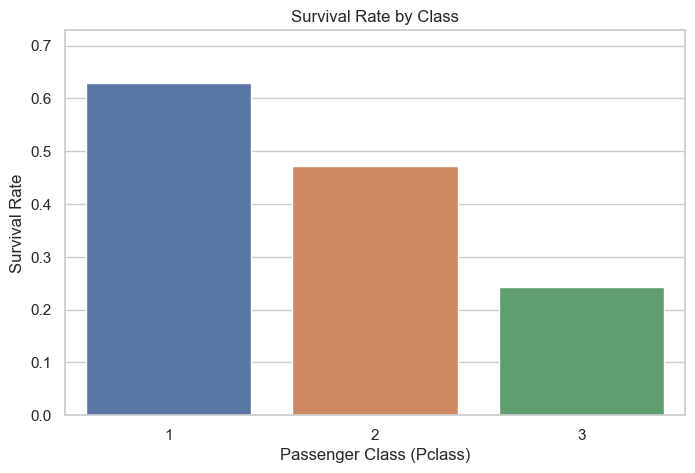

In [14]:
# bar plot showing the survival rate for each passenger class
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Pclass', y='Survived', errcolor='none')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Class')
plt.show()

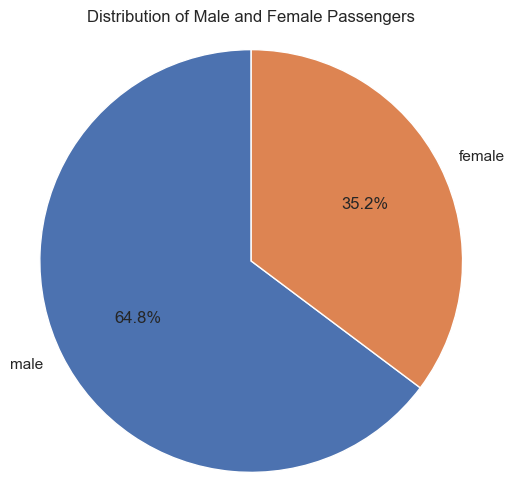

In [15]:

#  pie chart to show the distribution of male and female passengers
gender_distribution = df['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Male and Female Passengers')
plt.show()

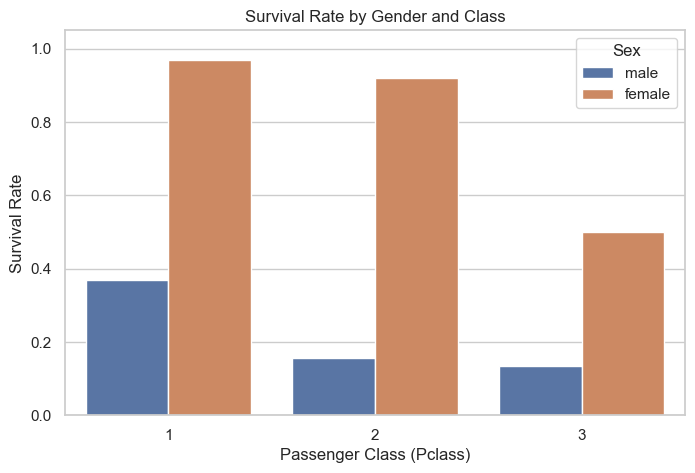

In [16]:
# stacked bar chart to show the survival rate for both genders in each passenger class
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex',errcolor='none')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender and Class')
plt.show()

##  Data Analysis

In [17]:
# survival rate of passengers

overall_survival_rate = df['Survived'].mean()
print("Overall Survival Rate: {:.2f}%".format(overall_survival_rate * 100))


Overall Survival Rate: 38.38%


In [18]:
#average age of passengers who survived and passengers who did not survive

average_age_survived = df[df['Survived'] == 1]['Age'].mean()
average_age_not_survived = df[df['Survived'] == 0]['Age'].mean()

print("Average Age of Survivors: {:.2f} years".format(average_age_survived))
print("Average Age of Non-Survivors: {:.2f} years".format(average_age_not_survived))



Average Age of Survivors: 28.55 years
Average Age of Non-Survivors: 30.42 years


In [19]:
#percentage of passengers who survived in each passenger class

class_survival_rates = df.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Class:")
print(class_survival_rates)


Survival Rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [20]:
# median fare for passengers who survived and passengers who did not survive:

median_fare_survived = df[df['Survived'] == 1]['Fare'].median()
median_fare_not_survived = df[df['Survived'] == 0]['Fare'].median()

print("Median Fare for Survivors: ${:.2f}".format(median_fare_survived))
print("Median Fare for Non-Survivors: ${:.2f}".format(median_fare_not_survived))



Median Fare for Survivors: $26.00
Median Fare for Non-Survivors: $10.50


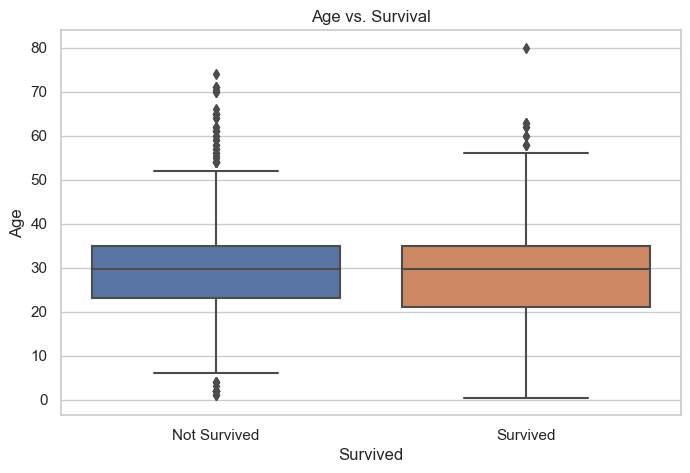

In [21]:
# relationship between age and survival

plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Age vs. Survival')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


##  Feature Engineering

In [22]:
#new feature called "FamilySize"

df['FamilySize'] = df['SibSp'] + df['Parch']


In [23]:
# relationship between family size and survival rate:
family_survival_rates = df.groupby('FamilySize')['Survived'].mean()
print("Survival Rate by Family Size:")
print(family_survival_rates)


Survival Rate by Family Size:
FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


In [24]:
#new feature called "Title" 

import re

df['Title'] = df['Name'].apply(lambda name: re.search(r',\s(.*?)\.', name).group(1))


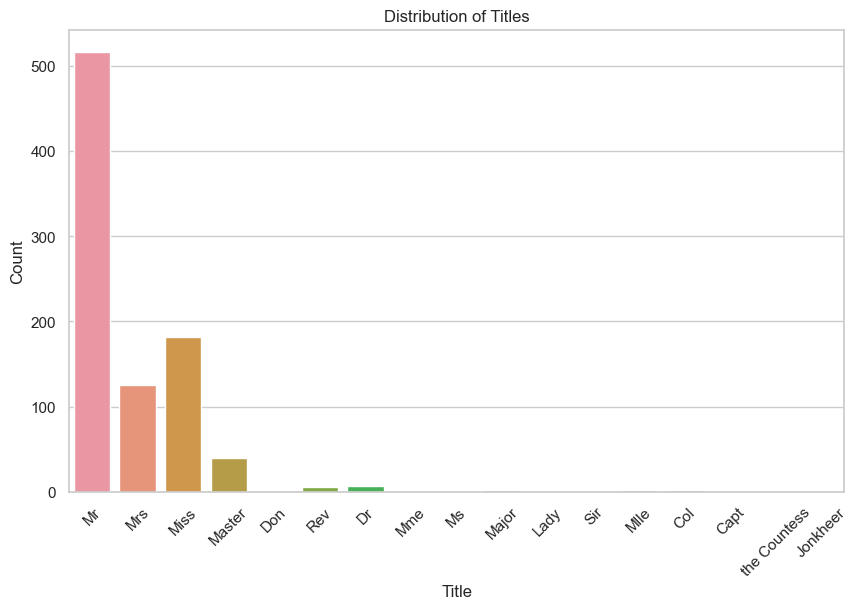

In [25]:
# Distribution of titles
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Distribution of Titles')
plt.xticks(rotation=45)
plt.show()



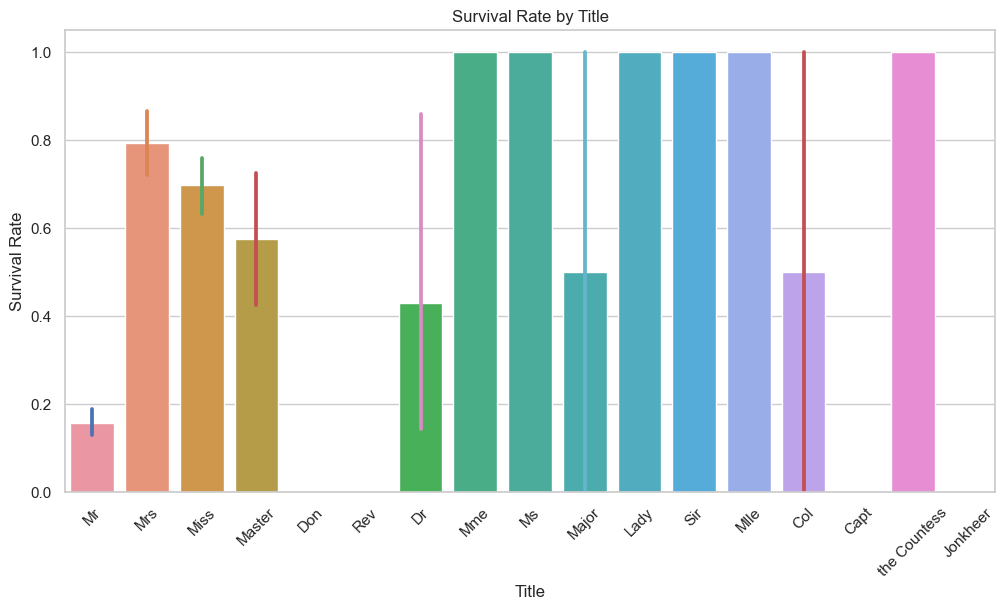

In [26]:
# Impact of titles on survival
title_survival_rates = df.groupby('Title')['Survived'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Title', y='Survived', errcolor=None)
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Title')
plt.xticks(rotation=45)
plt.show()


## conclusion


In conclusion, after analyzing the Titanic dataset, we can summarize the findings and insights regarding factors that influenced passenger survival on the Titanic:

1. Overall Survival Rate: 
The overall survival rate for passengers on the Titanic was approximately 38.38%. This means that a significant proportion of passengers did not survive the tragic event.

2. Age and Survival:
 There is a variation in the age distribution between passengers who survived and those who did not. Younger passengers, particularly children, had a higher survival rate, while older passengers had a lower survival rate. This suggests that age played a role in determining survival.

3. Passenger Class and Survival: 
The passenger class (Pclass) had a significant impact on survival. Passengers in higher classes (1st class) had a higher chance of survival compared to passengers in lower classes (3rd class). This indicates a socio-economic factor in survival.

4. Gender and Survival: 
Gender was another critical factor in survival. Female passengers had a much higher survival rate compared to male passengers. This chivalrous behavior is reflected in the higher survival rate of women.

5. Family Size and Survival: 
Family size, represented by the "FamilySize" feature (combining SibSp and Parch), showed varying effects on survival. Passengers traveling with a moderate-sized family had a higher chance of survival, while those traveling alone or with very large families had lower survival rates.

6. Titles and Survival: 
Analyzing the titles extracted from passenger names revealed variations in survival rates based on titles. Titles such as "Mrs." and "Miss" had higher survival rates, possibly due to a priority given to women. Other titles like "Mr." had lower survival rates.

7. Embarked Port and Survival:
 The port of embarkation (Embarked) also had some influence on survival. Passengers who boarded from Cherbourg (C) had a higher survival rate compared to those from Southampton (S) and Queenstown (Q).

In summary, passenger class, gender, age, family size, titles, and port of embarkation all played roles in influencing survival on the Titanic. These findings align with historical accounts of the Titanic disaster, where women and children were given priority, and the socio-economic class of passengers had an impact on access to lifeboats. This analysis provides insights into the complex factors that contributed to the tragic events on the Titanic.